In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import concatenate, Dense, Input, Flatten
from keras.optimizers import Adam

import sys
sys.path.append('../module/')

from util import moving_average
import gym2
from rl2.agents import eventDDPGAgent
from rl2.memory import SequentialMemory

Using TensorFlow backend.


In [2]:
# GymのPendulum環境を作成
dt = 0.005
env = gym2.make("Pendulum-v1", dt)
clip = 10.
env.max_torque, max_torque = clip, clip
env.action_space.high, env.action_space.low = max_torque, -max_torque

# 取りうる”打ち手”のアクション数と値の定義
nb_actios = 2
ACT_ID_TO_VALUE = {0: [-1], 1: [+1]}

In [3]:
def actor_net(a_shape, s_shape):
    action_input = Input(shape=(1,)+s_shape)
    x = Flatten()(action_input)
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(3, activation="tanh")(x)
    actor = Model(inputs=action_input, outputs=x)
    return actor

def critic_net(a_shape , s_shape):
    action_input = Input(a_shape)
    observation_input = Input(shape=(1,)+s_shape)
    flattened_observation = Flatten()(observation_input)
    x = concatenate([action_input, flattened_observation])
    x = Dense(16, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1, activation="linear")(x)
    critic = Model(inputs=[action_input, observation_input], outputs=x)
    return (critic, action_input)

In [4]:
def agent(a_shape, s_shape):
    actor = actor_net(a_shape, s_shape)
    critic,  critic_action_input = critic_net(a_shape, s_shape)
    memory = SequentialMemory(limit = 50000, window_length = 1)
    agent = eventDDPGAgent(
        a_shape[0],
        actor,
        critic,
        critic_action_input,
        memory,
        clip_com = 0.01
    )
    return agent

In [7]:
#safe learning
l = 0.5
step = 3000000
episode_step = int(200 * 0.05 / dt)
time_mode = False
a = agent((3,), env.observation_space.shape)
a.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
#a.load_weights('../learned_models_vol2/0.5standup-agent.h5')
a.fit(env, lam=l, nb_steps=step, visualize=0, verbose=1, nb_max_episode_steps=episode_step, loss_graph=0, time_mode=time_mode)
print(a.episode_rewards)

Training for 3000000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 56s 6ms/step - reward: -8.2498
5 episodes - episode_reward: -16499.698 [-17129.546, -15282.880] - loss: 1066328.254 - mean_absolute_error: 122.711 - mean_q: -8.992

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 61s 6ms/step - reward: -8.3954
5 episodes - episode_reward: -16790.772 [-17718.633, -15993.322] - loss: 2169979.250 - mean_absolute_error: 81.374 - mean_q: -9.650

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: -7.9774
5 episodes - episode_reward: -15954.769 [-16860.052, -14956.542] - loss: 1303353.250 - mean_absolute_error: 46.289 - mean_q: -29.586

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 64s 6ms/step - reward: -7.2296
5 episodes - episode_reward: -14459.264 [-17153.021, -12554.421] - loss: 927079.812 - mean_absolute_error: 74.083 - mean

10000/10000 [==============================] - 62s 6ms/step - reward: -7.8589
5 episodes - episode_reward: -15717.727 [-17420.804, -14258.207] - loss: 162315.797 - mean_absolute_error: 66.977 - mean_q: -974.978

Interval 35 (340000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -8.3900
5 episodes - episode_reward: -16780.000 [-18013.064, -15561.542] - loss: 2277109.500 - mean_absolute_error: 82.355 - mean_q: -984.059

Interval 36 (350000 steps performed)
10000/10000 [==============================] - 61s 6ms/step - reward: -7.5350
5 episodes - episode_reward: -15070.072 [-17024.443, -9369.976] - loss: 2764519.750 - mean_absolute_error: 93.085 - mean_q: -985.034

Interval 37 (360000 steps performed)
10000/10000 [==============================] - 61s 6ms/step - reward: -7.7673
5 episodes - episode_reward: -15534.671 [-17984.398, -13926.652] - loss: 1866934.625 - mean_absolute_error: 92.657 - mean_q: -925.210

Interval 38 (370000 steps performed)
10

10000/10000 [==============================] - 67s 7ms/step - reward: -7.6686
5 episodes - episode_reward: -15337.125 [-16385.264, -14115.340] - loss: 83119.523 - mean_absolute_error: 54.576 - mean_q: -932.568

Interval 68 (670000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.3305
5 episodes - episode_reward: -14661.031 [-15698.611, -12049.684] - loss: 67765.977 - mean_absolute_error: 50.439 - mean_q: -932.788

Interval 69 (680000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.6531
5 episodes - episode_reward: -15306.193 [-16919.176, -13227.583] - loss: 1267121.125 - mean_absolute_error: 95.680 - mean_q: -968.220

Interval 70 (690000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.2048
5 episodes - episode_reward: -14409.601 [-15715.287, -12266.129] - loss: 1171373.125 - mean_absolute_error: 89.888 - mean_q: -952.687

Interval 71 (700000 steps performed)
1000

10000/10000 [==============================] - 61s 6ms/step - reward: -7.3491
5 episodes - episode_reward: -14698.194 [-16102.880, -12387.125] - loss: 12994.675 - mean_absolute_error: 31.087 - mean_q: -722.852

Interval 101 (1000000 steps performed)
10000/10000 [==============================] - 61s 6ms/step - reward: -7.5412
5 episodes - episode_reward: -15082.430 [-16234.402, -13042.368] - loss: 18963.438 - mean_absolute_error: 38.612 - mean_q: -748.362

Interval 102 (1010000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: -6.6914
5 episodes - episode_reward: -13382.750 [-16404.306, -9410.761] - loss: 19871.072 - mean_absolute_error: 38.315 - mean_q: -747.094

Interval 103 (1020000 steps performed)
10000/10000 [==============================] - 63s 6ms/step - reward: -7.9594
5 episodes - episode_reward: -15918.796 [-16730.230, -15447.789] - loss: 15727.867 - mean_absolute_error: 38.063 - mean_q: -747.584

Interval 104 (1030000 steps performed)
1

10000/10000 [==============================] - 62s 6ms/step - reward: -7.3860
5 episodes - episode_reward: -14772.004 [-16585.562, -12388.870] - loss: 15353807.000 - mean_absolute_error: 120.028 - mean_q: -892.596

Interval 134 (1330000 steps performed)
10000/10000 [==============================] - 67s 7ms/step - reward: -7.2935
5 episodes - episode_reward: -14586.901 [-16516.706, -9865.861] - loss: 264788.688 - mean_absolute_error: 26.668 - mean_q: -785.618

Interval 135 (1340000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: -7.7267
5 episodes - episode_reward: -15453.416 [-17049.101, -13810.637] - loss: 5308.365 - mean_absolute_error: 24.432 - mean_q: -764.474

Interval 136 (1350000 steps performed)
10000/10000 [==============================] - 62s 6ms/step - reward: -7.0171
5 episodes - episode_reward: -14034.294 [-16234.198, -11025.397] - loss: 4310.499 - mean_absolute_error: 26.963 - mean_q: -750.111

Interval 137 (1360000 steps performed

10000/10000 [==============================] - 66s 7ms/step - reward: -7.2455
5 episodes - episode_reward: -14491.031 [-16965.379, -10563.353] - loss: 1297.361 - mean_absolute_error: 19.053 - mean_q: -695.154

Interval 167 (1660000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.4742
5 episodes - episode_reward: -14948.361 [-15723.291, -13482.191] - loss: 1620.052 - mean_absolute_error: 20.659 - mean_q: -704.735

Interval 168 (1670000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.3886
5 episodes - episode_reward: -14777.275 [-16789.062, -12393.538] - loss: 16501.498 - mean_absolute_error: 29.168 - mean_q: -710.119

Interval 169 (1680000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -7.5314
5 episodes - episode_reward: -15062.710 [-16100.204, -13544.230] - loss: 22828.592 - mean_absolute_error: 34.159 - mean_q: -720.153

Interval 170 (1690000 steps performed)
10

10000/10000 [==============================] - 60s 6ms/step - reward: -7.5824
5 episodes - episode_reward: -15164.730 [-16563.717, -13221.890] - loss: 2588.795 - mean_absolute_error: 20.508 - mean_q: -653.927

Interval 200 (1990000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -6.9348
5 episodes - episode_reward: -13869.677 [-15344.583, -12452.591] - loss: 2518.857 - mean_absolute_error: 20.255 - mean_q: -670.406

Interval 201 (2000000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -7.6394
5 episodes - episode_reward: -15278.762 [-16452.733, -14083.226] - loss: 1565.930 - mean_absolute_error: 16.527 - mean_q: -669.917

Interval 202 (2010000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -7.1002
5 episodes - episode_reward: -14200.497 [-15824.598, -13279.833] - loss: 315550.969 - mean_absolute_error: 22.066 - mean_q: -673.348

Interval 203 (2020000 steps performed)
10

10000/10000 [==============================] - 60s 6ms/step - reward: -7.3337
5 episodes - episode_reward: -14667.345 [-16026.582, -11296.778] - loss: 3034.006 - mean_absolute_error: 28.540 - mean_q: -772.865

Interval 265 (2640000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -7.1667
5 episodes - episode_reward: -14333.314 [-16051.112, -11844.420] - loss: 3003.289 - mean_absolute_error: 26.649 - mean_q: -762.500

Interval 266 (2650000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -7.9181
5 episodes - episode_reward: -15836.163 [-16884.016, -15044.953] - loss: 2919.708 - mean_absolute_error: 25.112 - mean_q: -766.798

Interval 267 (2660000 steps performed)
10000/10000 [==============================] - 61s 6ms/step - reward: -7.1679
5 episodes - episode_reward: -14335.786 [-15084.632, -13434.942] - loss: 7595.503 - mean_absolute_error: 22.465 - mean_q: -764.258

Interval 268 (2670000 steps performed)
1000

10000/10000 [==============================] - 61s 6ms/step - reward: -7.8441
5 episodes - episode_reward: -15688.179 [-15985.809, -14806.775] - loss: 56353.355 - mean_absolute_error: 41.340 - mean_q: -371.042

Interval 298 (2970000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -6.9804
5 episodes - episode_reward: -13960.888 [-15308.684, -9866.977] - loss: 31275.449 - mean_absolute_error: 38.474 - mean_q: -333.550

Interval 299 (2980000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -6.8139
5 episodes - episode_reward: -13627.761 [-14743.509, -12931.230] - loss: 31234.359 - mean_absolute_error: 36.513 - mean_q: -333.823

Interval 300 (2990000 steps performed)
10000/10000 [==============================] - 60s 6ms/step - reward: -7.3194
done, took 19423.626 seconds
[-15282.879580749373, -16258.73665457206, -17129.545560468014, -16848.327387285022, -16978.99919857708, -17128.800570964773, -17718.633260405128

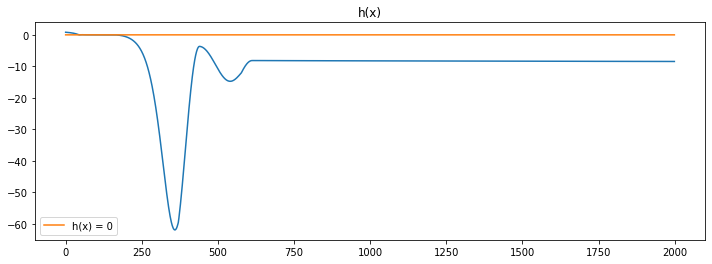

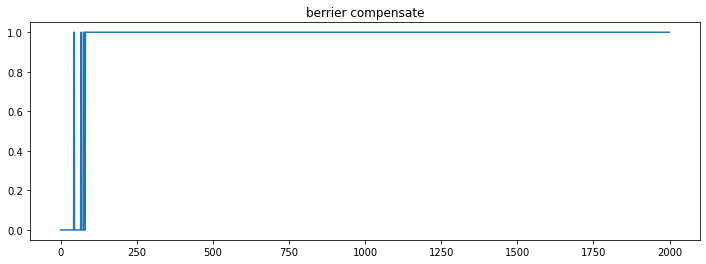

In [9]:
# first episode log
episode_step = int(200 * 0.05 / dt)
plt.figure(figsize=(12,4))
plt.title('h(x)')
plt.plot(range(episode_step), a.cbf_log[:episode_step,0])
plt.plot(range(episode_step), np.zeros(episode_step,), label='h(x) = 0')
#plt.ylim(-10,1)
plt.legend()
plt.show()
plt.figure(figsize=(12,4))
plt.title('berrier compensate')
plt.plot(range(episode_step), a.cbf_log[:episode_step,1])
plt.show()

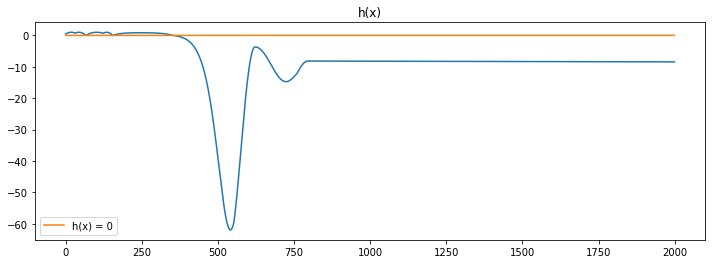

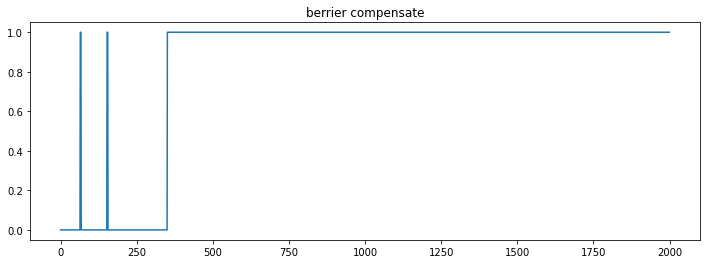

In [29]:
# log per episode
interval = 52
plt.figure(figsize=(12,4))
plt.title('h(x)')
plt.plot(range(episode_step), a.cbf_log[episode_step * interval : episode_step * (interval+1), 0])
plt.plot(range(episode_step), np.zeros(episode_step ,), label='h(x) = 0')
#plt.ylim(-10,1)
plt.legend()
plt.show()
plt.figure(figsize=(12,4))
plt.title('berrier compensate')
plt.plot(range(episode_step), a.cbf_log[episode_step * interval : episode_step * (interval+1),1])
plt.show()

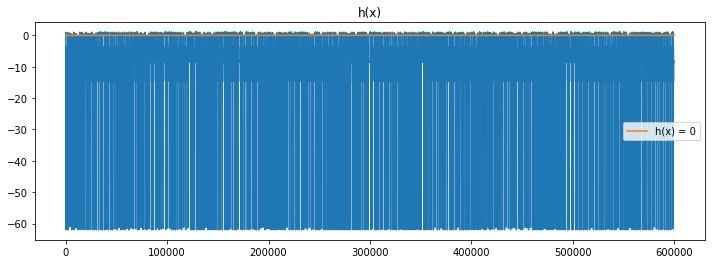

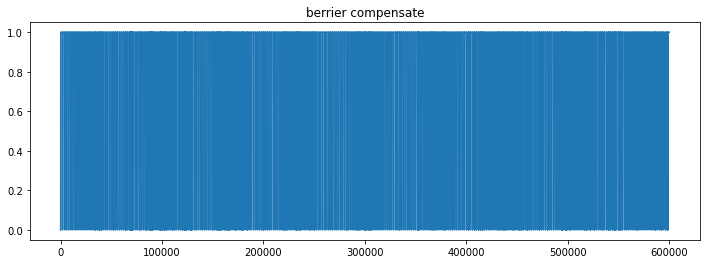

In [30]:
# log throughout learning
plt.figure(figsize=(12,4))
plt.title('h(x)')
plt.plot(range(600000), a.cbf_log[:600000,0])
plt.plot(range(600000), np.zeros(600000,), label='h(x) = 0')
#plt.ylim(-10,1)
plt.legend()
plt.show()
plt.figure(figsize=(12,4))
plt.title('berrier compensate')
plt.plot(range(600000), a.cbf_log[:600000,1])
plt.show()

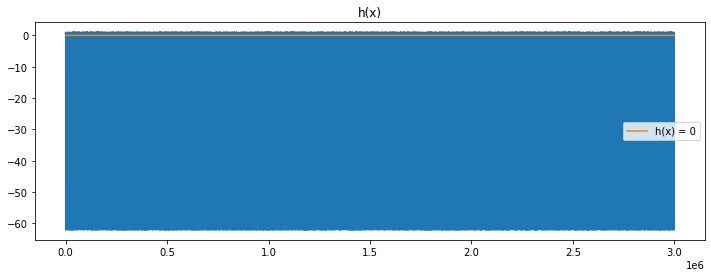

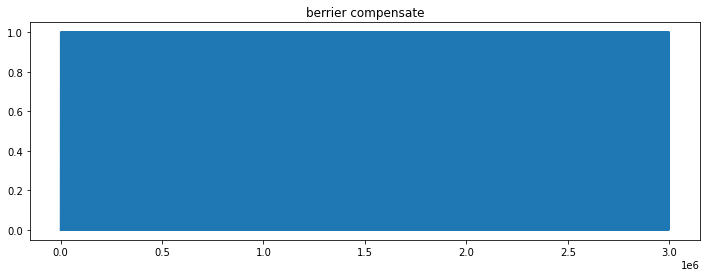

In [9]:
# log throughout learning
plt.figure(figsize=(12,4))
plt.title('h(x)')
plt.plot(range(step), a.cbf_log[:,0])
plt.plot(range(step), np.zeros(step,), label='h(x) = 0')
#plt.ylim(-10,1)
plt.legend()
plt.show()
plt.figure(figsize=(12,4))
plt.title('berrier compensate')
plt.plot(range(step), a.cbf_log[:,1])
plt.show()

In [32]:
#a.load_weights('../learned_models_vol2/0.5standup-agent.h5')
a.test(env, lam=l, visualize=0, nb_max_episode_steps=episode_step, action_view=0, time_mode=time_mode)

Testing for 1 episodes ...
Episode 1: reward: -18724.331, steps: 2000


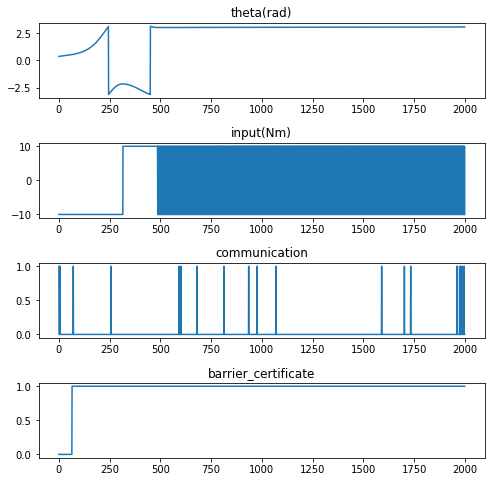

In [34]:
titles = ['theta(rad)', 'input(Nm)', 'communication', 'barrier_certificate'] 
history = a.data_log[0]
x_axis = range(episode_step)
plt.figure(figsize=(8,8))
plt.subplots_adjust(wspace=0.4, hspace=0.6)
for i in range(4):
    data = history[:,i]
    plt.subplot(4,1,i+1)
    plt.title(titles[i])
    plt.plot(x_axis, data)
plt.show()

In [35]:
a.save_weights('../learned_models_safe/3000000_e2000_l05_pure.h5')

[WARNING] ../learned_models_safe/3000000_e2000_l05_pure_actor.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!
[WARNING] ../learned_models_safe/3000000_e2000_l05_pure_critic.h5 already exists - overwrite? [y/n]y
[TIP] Next time specify overwrite=True!


(array([ 949.,   11.,    0.,    0.,    4.,   12.,    5.,    3.,    3.,
        1013.]),
 array([-3.14158925e+00, -2.51327466e+00, -1.88496007e+00, -1.25664549e+00,
        -6.28330898e-01, -1.63091561e-05,  6.28298279e-01,  1.25661287e+00,
         1.88492746e+00,  2.51324205e+00,  3.14155663e+00]),
 <a list of 10 Patch objects>)

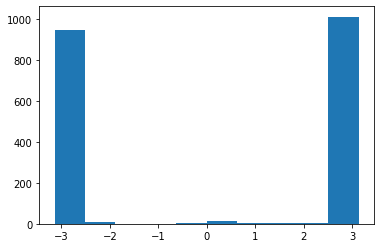

In [11]:
plt.hist(history[:,0])

In [22]:
import csv

with open("../learning_log_pure.csv", "w") as f:
    writer = csv.writer(f)
    for row in a.cbf_log:
        writer.writerow(row)

In [18]:
#safe learning
l = 0.5
step = 600000
episode_step = int(200 * 0.05 / dt)
time_mode = False
b = agent((3,), env.observation_space.shape)
b.compile(Adam(lr=0.001, clipnorm=1.), metrics=["mae"])
#a.load_weights('../learned_models_vol2/0.5standup-agent.h5')
dd = b.fit(env, lam=l, nb_steps=step, visualize=0, verbose=1, nb_max_episode_steps=episode_step, loss_graph=0, time_mode=time_mode)

Training for 600000 steps ...
Interval 1 (0 steps performed)
  367/10000 [>.............................] - ETA: 28s - reward: -3.1643done, took 1.098 seconds


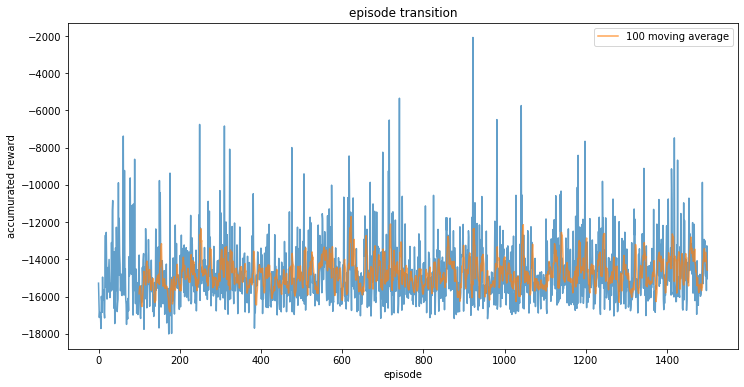

In [39]:
l = 100
plt.figure(figsize=(12,6))
ma = moving_average(a.episode_rewards, l)
plt.plot(range(len(a.episode_rewards)), a.episode_rewards, alpha=0.7)
plt.plot(range(l, len(a.episode_rewards)), ma, label=f'{l} moving average', alpha=0.7)
plt.xlabel('episode')
plt.ylabel('accumurated reward')
plt.title('episode transition')
plt.legend()
plt.show()